# Customer Shopping Trends Dataset
This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

# Dataset Glossary (Column-wise)
- Customer ID - Unique identifier for each customer
- Age - Age of the customer
- Gender - Gender of the customer (Male/Female)
- Item Purchased - The item purchased by the customer
- Category - Category of the item purchased
- Purchase Amount (USD) - The amount of the purchase in USD
- Location - Location where the purchase was made
- Size - Size of the purchased item
- Color - Color of the purchased item
- Season - Season during which the purchase was made
- Review Rating - Rating given by the customer for the purchased item
- Subscription Status - Indicates if the customer has a subscription (Yes/No)
- Shipping Type - Type of shipping chosen by the customer
- Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
- Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
- Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- Payment Method - Customer's most preferred payment method
- Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import csv file
df = pd.read_csv('shopping_trends_updated.csv', encoding= 'unicode_escape')

In [3]:
# Drop rows with missing values
df = df.dropna()
 
# Display the initial information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# Insights

**1. Seasonal Patterns:** Identify seasonal trends in shopping behavior. Are there specific times of the year when customers spend more money or shop more frequently?

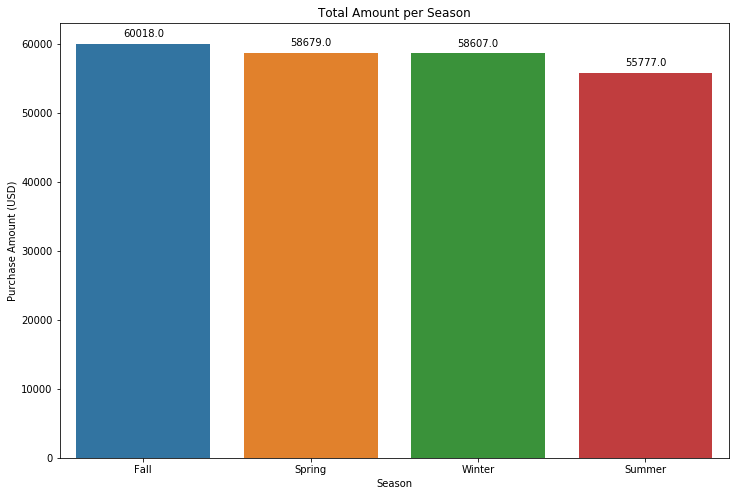

In [16]:
# Calculate Seasons vs total Purchase Amount
sales_gen = df.groupby(['Season'], as_index=False)['Purchase Amount (USD)'].sum().sort_values(by='Purchase Amount (USD)', ascending=False)

# Create a bar chart for Season and it's total Purchase Amount
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = 'Season',y= 'Purchase Amount (USD)' ,data = sales_gen)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Total Amount each Season')

# Show the plot
plt.show()

Based on the visualization results above, it can be seen that Customers spend the highest amount of money in Fall, this can happen because it is approaching Winter, so the type of clothing purchased tends to have thicker materials so the price is more expensive, while the lowest amount of money spent occurs in the Summer, which is because in that season there is no need to buy clothes made of thick material so the price is cheaper.

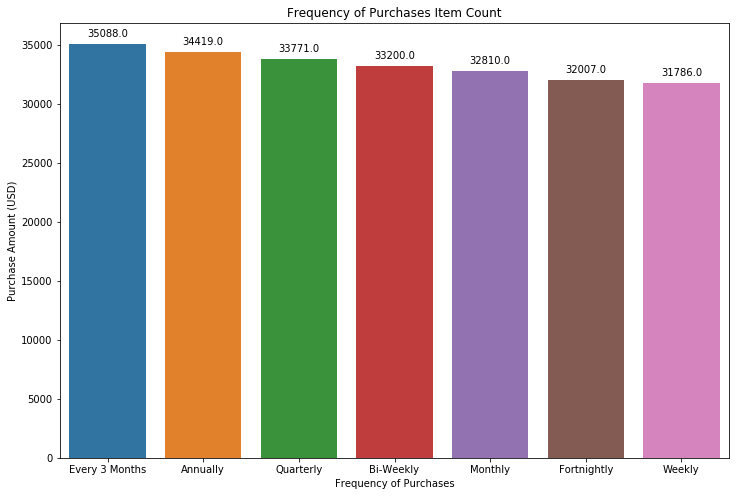

In [19]:
# Calculate Frequency of Purchases vs total Purchase Amount
freq_sales = df.groupby(['Frequency of Purchases'], as_index=False)['Purchase Amount (USD)'].sum().sort_values(by='Purchase Amount (USD)', ascending=False)

# Create a bar chart for Frequency of Purchases and it's total Purchase Amount
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = 'Frequency of Purchases',y= 'Purchase Amount (USD)',data = freq_sales)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Frequency of Purchases Item')

# Show the plot
plt.show()

It can be seen that the highest total Purchased Amount spent by customers is when making purchases once every 3 months, and the least is every weekly purchase.

**2. Product Preferences:** Determine the most popular products or categories. What do customers buy the most? This can help with inventory management and marketing.

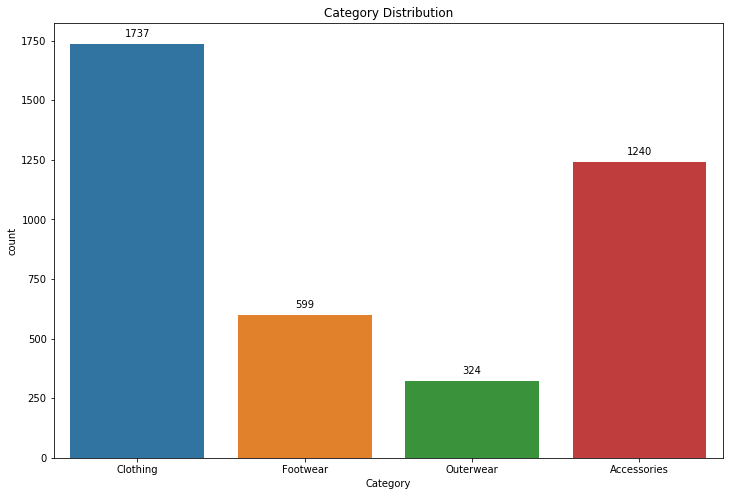

In [32]:
# Create a bar chart for Category and it's count
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'Category',data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Category Distribution')

# Show the plot
plt.show()

The clothing category ranks highest in terms of goods purchased by Customers with 1737 items, then accessories with 1240 items, footwear with 599 items and outwear with 324 items. Therefore, shops can focus more on stocking clothing categories for Customers.

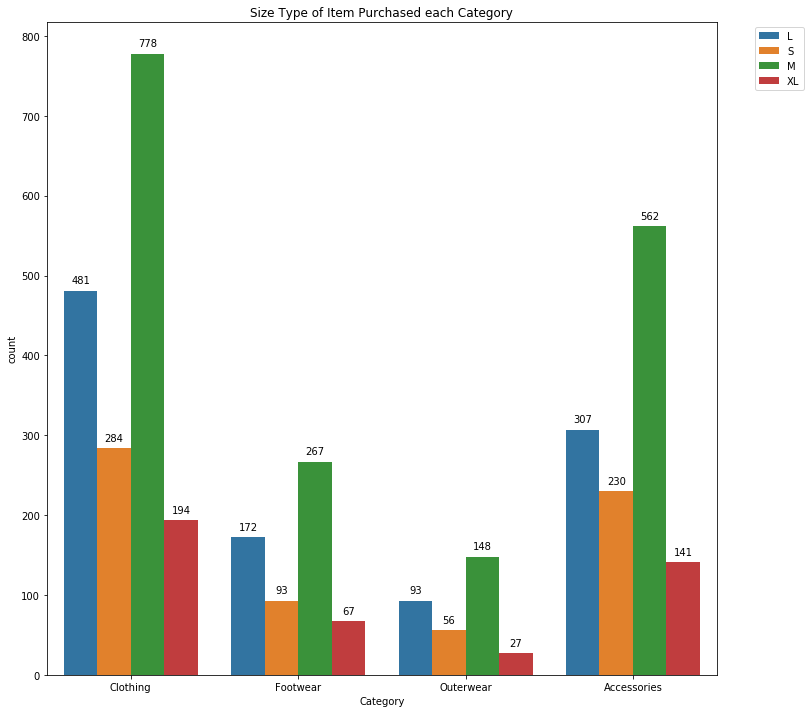

In [8]:
# Create a plot chart for Category and it's Size
plt.figure(figsize=(12, 12))
ax = sns.countplot(data = df, x = 'Category', hue = 'Size')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Move the legend outside the image
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title
plt.title('Size Type of Purchases Item each Category')

# Show the plot
plt.show()

It can be seen that for the size type of each category of items sold, size M is more popular with Customers, followed by size L, size S and finally size XL. Therefore, sellers can increase stock in the XL size category of goods compared to other sizes.

**3. Demographic Insights:** Segment customers based on demographics like gender. Do different demographics have distinct shopping preferences?

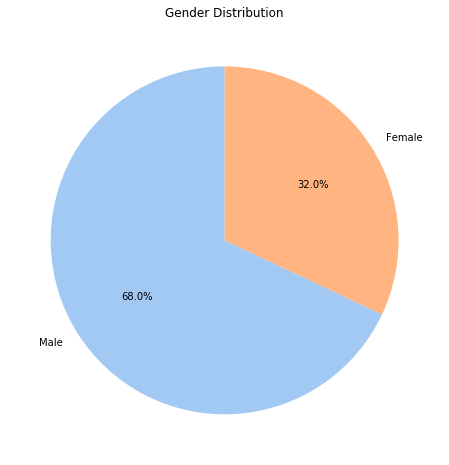

In [23]:
# Calculate Gender counts
gender_counts = df['Gender'].value_counts()

# Create a pie chart for Gender
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Gender Distribution')

# Show the plot
plt.show()

In the pie chart visualization, it is known that the number of male Customers is 68% while the number of female Customers is 32%.

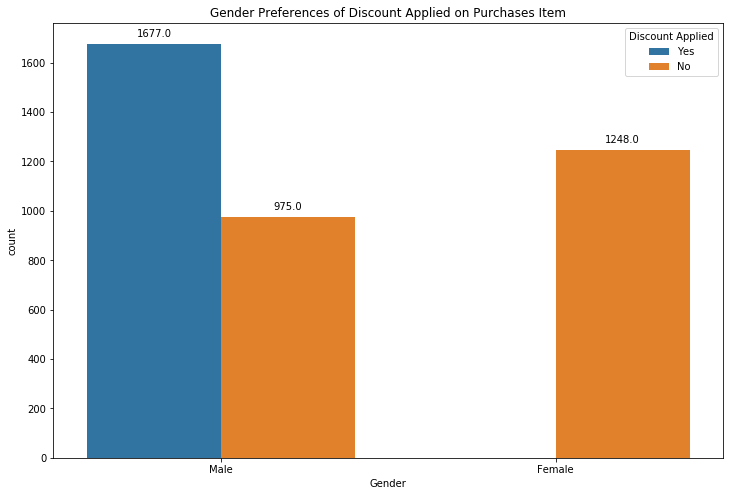

In [15]:
# Create a plot chart for Gender and it's Discount Applied
plt.figure(figsize=(12, 8))
ax = sns.countplot(data = df, x = 'Gender', hue = 'Discount Applied')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Gender Preferences of Discount Applied on Purchases Item')

# Show the plot
plt.show()

From the visualization results above, it was found that more male Customers purchased items for discounted items, while female Customers did not buy discounted items.

**4. Payment Method Analysis:** Assess which Payment Method are the most popular among customers.

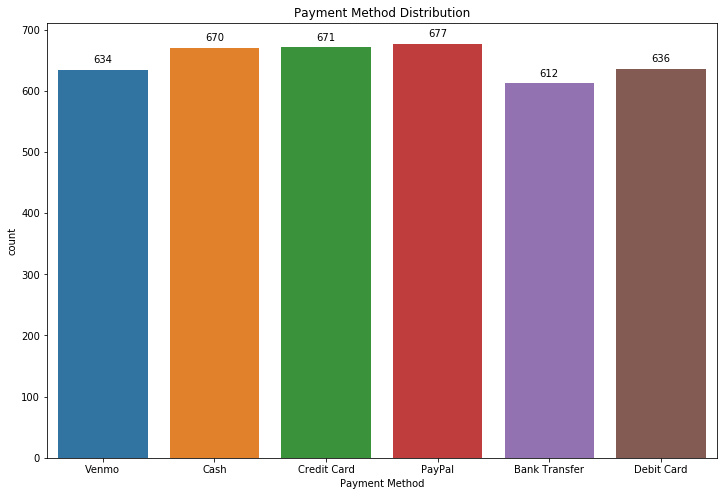

In [12]:
# Create a bar chart for Payment Method and it's count
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'Payment Method',data = df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Payment Method Distribution')

# Show the plot
plt.show()

When it comes to payment methods used by customers, PayPal is the most common, followed by Credit Card, Cash, Debit Card, Venmo, and finally Bank Transfer. However, the difference between using each payment method is not very significant.

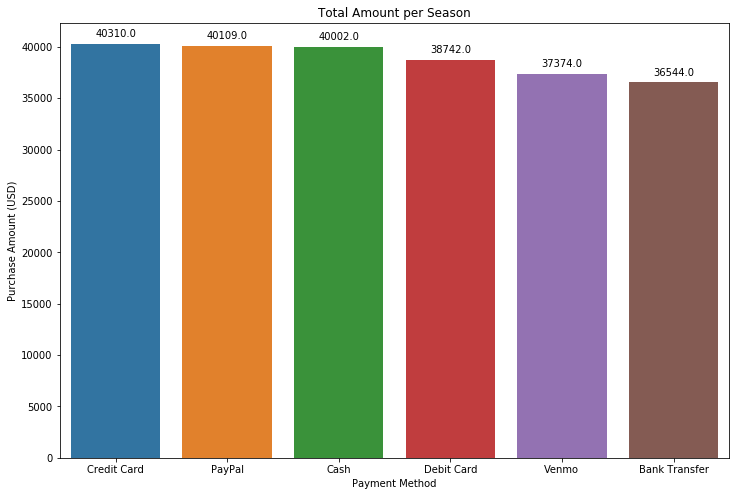

In [13]:
# Calculate Payment Method vs total Purchase Amount
payment = df.groupby(['Payment Method'], as_index=False)['Purchase Amount (USD)'].sum().sort_values(by='Purchase Amount (USD)', ascending=False)

# Create a bar chart for Payment Method and it's total Purchase Amount
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = 'Payment Method',y= 'Purchase Amount (USD)' ,data = payment)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Total Purchase Amount each Payment Method')

# Show the plot
plt.show()

However, based on the calculation of the total Purchased Amount based on each payment method used, the highest total amount purchased was by the Credit Card method followed by the PayPal, Cash, Debit Card, Venmp and Bank transfer methods.